# **USED CAR PRICE PREDICTION FROM Ebay-Kleinanzeigen**

*   645162020013 คมปรัชญ์ เบญจาพุทธารักษ์
*   645162020022 สิทธิ โง้ววัฒนา
*   645162020033 สุเชฏฐ์ เหร่บุตร

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import xgboost as xgb
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  RandomForestRegressor,GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
from google.colab import files
from pandas.core.common import SettingWithCopyWarning
from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
sns.set(rc={'figure.figsize':(15,10)})

### **CHECKING DATA AND PREPARE DATA** 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# df = pd.read_csv('/content/drive/Shareddrives/term_project/autos.csv',encoding='ISO-8859-1')
# df.drop(df.columns[0], axis=1, inplace=True)
# df.head()
# df

In [ ]:
#pip install pgeocode

In [ ]:
#import pgeocode

In [ ]:
#nomi = pgeocode.Nominatim('de')

In [ ]:
#x = nomi.query_postal_code("10115")
#x = x['place_name']
#x

'Berlin'

In [ ]:
#df['postalCode'].value_counts()

10115    828
65428    637
66333    349
38518    326
44145    323
        ... 
67693      1
95367      1
63874      1
67377      1
31096      1
Name: postalCode, Length: 8150, dtype: int64

In [ ]:
#z = df['postalCode'].astype(str)

In [ ]:
#zzz = z[:10]

In [ ]:
# list_place = []
# for i in z :
#   a = nomi.query_postal_code(i)
#   b = str(a['place_name'])
#   c = b.split(",")
#   c = c[0]
#   list_place.append(c)

In [ ]:
# add columns place name
#df['place'] = list_place

In [ ]:
# brand_map
# df3 = pd.read_csv('/content/drive/Shareddrives/term_project/brand_map.csv',usecols= ['brand','origin_counrty','region'])
# df3

,brand,origin_counrty,region
0,volkswagen,German,EU
1,audi,German,EU
2,jeep,United States,NorthA
3,skoda,Czech,EU
4,bmw,German,EU
5,peugeot,French,EU
6,ford,United States,NorthA
7,mazda,Japan,Asia
8,nissan,Japan,Asia
9,renault,French,EU


In [ ]:
# df = df.merge(df3,left_on='brand',right_on='brand',suffixes=(False, False))
# df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,place,origin_counrty,region
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,...,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57,Stuttgart,German,EU
1,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,...,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17,Herzogenaurach,German,EU
2,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manuell,50,...,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58,Perleberg,German,EU
3,2016-03-17 10:53:50,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,privat,Angebot,999,test,kleinwagen,1998,manuell,101,...,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06,Cuxhaven,German,EU
4,2016-04-07 10:06:22,Volkswagen_Passat_Variant_2.0_TDI_Comfortline,privat,Angebot,2799,control,kombi,2005,manuell,140,...,diesel,volkswagen,ja,2016-04-07 00:00:00,0,57290,2016-04-07 10:25:17,Neunkirchen,German,EU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-05 14:17:05,Lada_Niva_1.7i,privat,Angebot,3666,test,suv,2008,manuell,82,...,benzin,lada,nein,2016-03-04 00:00:00,0,35638,2016-03-07 12:17:35,Leun,Russia,EU
371524,2016-03-26 19:53:50,Lada_Niva_4x4__Allrad__HU_11/17,privat,Angebot,4500,control,suv,2007,manuell,82,...,benzin,lada,nein,2016-03-26 00:00:00,0,83487,2016-04-06 10:45:34,Marktschellenberg,Russia,EU
371525,2016-03-09 22:52:37,Lada_Niva_1.7i_Kult,privat,Angebot,2850,test,suv,2009,manuell,82,...,benzin,lada,nein,2016-03-09 00:00:00,0,73547,2016-03-12 14:15:40,Lorch,Russia,EU
371526,2016-03-07 21:59:03,Lada_2108_Funkstreifenwagen_Miliz_keine_Volksp...,privat,Angebot,2199,control,NaN,2016,manuell,0,...,NaN,lada,nein,2016-03-07 00:00:00,0,1796,2016-03-08 13:16:48,nan,Russia,EU


In [ ]:
# # exp file
# exp_file = df.to_csv('/content/drive/Shareddrives/term_project/final_data.csv')

In [ ]:
# read data again to save time
df = pd.read_csv('/content/drive/Shareddrives/term_project/final_data.csv')
df

,Unnamed: 0,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,place,origin_counrty,region
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57,Stuttgart,German,EU
1,1,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17,Herzogenaurach,German,EU
2,2,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manuell,...,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58,Perleberg,German,EU
3,3,2016-03-17 10:53:50,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,privat,Angebot,999,test,kleinwagen,1998,manuell,...,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06,Cuxhaven,German,EU
4,4,2016-04-07 10:06:22,Volkswagen_Passat_Variant_2.0_TDI_Comfortline,privat,Angebot,2799,control,kombi,2005,manuell,...,diesel,volkswagen,ja,2016-04-07 00:00:00,0,57290,2016-04-07 10:25:17,Neunkirchen,German,EU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,371523,2016-03-05 14:17:05,Lada_Niva_1.7i,privat,Angebot,3666,test,suv,2008,manuell,...,benzin,lada,nein,2016-03-04 00:00:00,0,35638,2016-03-07 12:17:35,Leun,Russia,EU
371524,371524,2016-03-26 19:53:50,Lada_Niva_4x4__Allrad__HU_11/17,privat,Angebot,4500,control,suv,2007,manuell,...,benzin,lada,nein,2016-03-26 00:00:00,0,83487,2016-04-06 10:45:34,Marktschellenberg,Russia,EU
371525,371525,2016-03-09 22:52:37,Lada_Niva_1.7i_Kult,privat,Angebot,2850,test,suv,2009,manuell,...,benzin,lada,nein,2016-03-09 00:00:00,0,73547,2016-03-12 14:15:40,Lorch,Russia,EU
371526,371526,2016-03-07 21:59:03,Lada_2108_Funkstreifenwagen_Miliz_keine_Volksp...,privat,Angebot,2199,control,NaN,2016,manuell,...,NaN,lada,nein,2016-03-07 00:00:00,0,1796,2016-03-08 13:16:48,NaN,Russia,EU


In [ ]:
# CPI (Consumer Price Index)
df2 = pd.read_csv('/content/drive/Shareddrives/term_project/CPI_baseON2015.csv')
df2

,Year,"Consumer price index,2015=100"
0,1991,65.5
1,1992,68.8
2,1993,71.9
3,1994,73.8
4,1995,75.1
5,1996,76.1
6,1997,77.6
7,1998,78.3
8,1999,78.8
9,2000,79.9


In [ ]:
df = df.merge(df2,left_on='yearOfRegistration',right_on='Year',suffixes=(False, False))

In [ ]:
df.dtypes

Unnamed: 0                         int64
dateCrawled                       object
name                              object
seller                            object
offerType                         object
price                              int64
abtest                            object
vehicleType                       object
yearOfRegistration                 int64
gearbox                           object
powerPS                            int64
model                             object
kilometer                          int64
monthOfRegistration                int64
fuelType                          object
brand                             object
notRepairedDamage                 object
dateCreated                       object
nrOfPictures                       int64
postalCode                         int64
lastSeen                          object
place                             object
origin_counrty                    object
region                            object
Year            

In [ ]:
df.describe(include='all')

,Unnamed: 0,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,place,origin_counrty,region,Year,"Consumer price index,2015=100"
count,357951.000000,357951,357951,357951,357951,3.579510e+05,357951,322201,357951.000000,340047,...,290405,357951,357951.0,357951.000000,357951,340299,357951,357951,357951.000000,357951.000000
unique,NaN,273265,223118,2,2,NaN,2,8,NaN,2,...,2,114,NaN,NaN,178749,5856,13,4,NaN,NaN
top,NaN,2016-03-19 21:49:56,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,...,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-06 13:15:54,Berlin,German,EU,NaN,NaN
freq,NaN,6,649,357949,357942,NaN,185506,91489,NaN,265446,...,255459,13906,NaN,NaN,16,14200,227054,295236,NaN,NaN
mean,185104.375613,NaN,NaN,NaN,NaN,1.631626e+04,NaN,NaN,2004.181128,NaN,...,NaN,NaN,0.0,50847.497222,NaN,NaN,NaN,NaN,2004.181128,85.803048
std,106610.448321,NaN,NaN,NaN,NaN,3.639752e+06,NaN,NaN,6.203678,NaN,...,NaN,NaN,0.0,25736.849528,NaN,NaN,NaN,NaN,6.203678,8.086956
min,0.000000,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1991.000000,NaN,...,NaN,NaN,0.0,1067.000000,NaN,NaN,NaN,NaN,1991.000000,65.500000
25%,93226.500000,NaN,NaN,NaN,NaN,1.150000e+03,NaN,NaN,1999.000000,NaN,...,NaN,NaN,0.0,30627.000000,NaN,NaN,NaN,NaN,1999.000000,78.800000
50%,184814.000000,NaN,NaN,NaN,NaN,2.950000e+03,NaN,NaN,2004.000000,NaN,...,NaN,NaN,0.0,49624.000000,NaN,NaN,NaN,NaN,2004.000000,84.900000
75%,277489.000000,NaN,NaN,NaN,NaN,7.200000e+03,NaN,NaN,2008.000000,NaN,...,NaN,NaN,0.0,71409.000000,NaN,NaN,NaN,NaN,2008.000000,91.900000


In [ ]:
# check how many missing and see percentage of missing comapred to all records
count_na = df.isnull().sum()
print (count_na)
print ((count_na / 371528)*100)

Unnamed: 0                           0
dateCrawled                          0
name                                 0
seller                               0
offerType                            0
price                                0
abtest                               0
vehicleType                      35750
yearOfRegistration                   0
gearbox                          17904
powerPS                              0
model                            18140
kilometer                            0
monthOfRegistration                  0
fuelType                         30735
brand                                0
notRepairedDamage                67546
dateCreated                          0
nrOfPictures                         0
postalCode                           0
lastSeen                             0
place                            17652
origin_counrty                       0
region                               0
Year                                 0
Consumer price index,2015

In [ ]:
# subset relevant columns
df = df[['seller','offerType','price','vehicleType','yearOfRegistration','gearbox','powerPS','model','kilometer','fuelType','brand','notRepairedDamage','place','origin_counrty','region','Consumer price index,2015=100']]
df

,seller,offerType,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,place,origin_counrty,region,"Consumer price index,2015=100"
0,privat,Angebot,480,NaN,1993,manuell,0,golf,150000,benzin,volkswagen,NaN,Stuttgart,German,EU,71.9
1,privat,Angebot,800,kleinwagen,1993,manuell,0,polo,150000,benzin,volkswagen,nein,NaN,German,EU,71.9
2,privat,Angebot,800,limousine,1993,manuell,0,golf,10000,benzin,volkswagen,ja,Frankfurt am Main,German,EU,71.9
3,privat,Angebot,300,kleinwagen,1993,manuell,90,golf,150000,benzin,volkswagen,NaN,Tarmstedt,German,EU,71.9
4,privat,Angebot,250,kleinwagen,1993,manuell,0,NaN,150000,benzin,volkswagen,ja,Lachendorf,German,EU,71.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357946,privat,Angebot,10000000,NaN,2019,manuell,10,NaN,5000,NaN,sonstige_autos,ja,Blomberg,Other,Other,105.3
357947,privat,Angebot,0,NaN,2019,NaN,0,NaN,150000,NaN,sonstige_autos,NaN,Westerstede,Other,Other,105.3
357948,privat,Angebot,1200,NaN,2019,manuell,140,156,150000,benzin,alfa_romeo,nein,Erlangen,Italy,EU,105.3
357949,privat,Angebot,1200,NaN,2019,manuell,140,156,150000,benzin,alfa_romeo,nein,Erlangen,Italy,EU,105.3


In [ ]:
col_list = list(df)
col_list

['seller',
 'offerType',
 'price',
 'vehicleType',
 'yearOfRegistration',
 'gearbox',
 'powerPS',
 'model',
 'kilometer',
 'fuelType',
 'brand',
 'notRepairedDamage',
 'place',
 'origin_counrty',
 'region',
 'Consumer price index,2015=100']

In [ ]:
# transalte data from German to English for better understanding
df = df.replace({'seller': {'privat': 'private', 'gewerblich': 'dealer'}})
df = df.replace({'gearbox': {'manuell': 'manual', 'automatik': 'automatic'}})
df = df.replace({'offerType': {'Angebot': 'sell', 'Gesuch': 'buy'}})
df = df.replace({'fuelType': {'benzin': 'benzene', 'disel': 'diesel', 'elektro': 'electro', 'andere':'other'}})
df = df.replace({'notRepairedDamage': {'ja': 1, 'nein': 0}})
df = df.replace({'vehicleType': {'kleinwagen': 'small car', 'kombi': 'station wagon', 'andere':'other'}})
df = df.replace({'brand': {'sonstige_autos':'other'}})
df

,seller,offerType,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,place,origin_counrty,region,"Consumer price index,2015=100"
0,private,sell,480,NaN,1993,manual,0,golf,150000,benzene,volkswagen,NaN,Stuttgart,German,EU,71.9
1,private,sell,800,small car,1993,manual,0,polo,150000,benzene,volkswagen,0.0,NaN,German,EU,71.9
2,private,sell,800,limousine,1993,manual,0,golf,10000,benzene,volkswagen,1.0,Frankfurt am Main,German,EU,71.9
3,private,sell,300,small car,1993,manual,90,golf,150000,benzene,volkswagen,NaN,Tarmstedt,German,EU,71.9
4,private,sell,250,small car,1993,manual,0,NaN,150000,benzene,volkswagen,1.0,Lachendorf,German,EU,71.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357946,private,sell,10000000,NaN,2019,manual,10,NaN,5000,NaN,other,1.0,Blomberg,Other,Other,105.3
357947,private,sell,0,NaN,2019,NaN,0,NaN,150000,NaN,other,NaN,Westerstede,Other,Other,105.3
357948,private,sell,1200,NaN,2019,manual,140,156,150000,benzene,alfa_romeo,0.0,Erlangen,Italy,EU,105.3
357949,private,sell,1200,NaN,2019,manual,140,156,150000,benzene,alfa_romeo,0.0,Erlangen,Italy,EU,105.3


In [ ]:
# checking unique value and patern in data
for i in range(len(col_list)):
  df_new = df[col_list[i]].unique()
  print(col_list[i])
  print(df_new)
  print('\n')

seller
['private' 'dealer']


offerType
['sell' 'buy']


price
[  480   800   300 ... 83990 68800 54899]


vehicleType
[nan 'small car' 'limousine' 'coupe' 'station wagon' 'bus' 'cabrio'
 'other' 'suv']


yearOfRegistration
[1993 2001 1998 2005 1995 2004 2016 2009 1994 2002 2017 2006 2008 2000
 2003 1997 1991 1999 1996 2010 2007 1992 2011 2012 2013 2018 2014 2015
 2019]


gearbox
['manual' 'automatic' nan]


powerPS
[    0    90    75    60    45    55    66   174   116    74   190    54
   247   110    40   300    98    78   150   160   115   140   113   136
    65    89    68   224    77   165    53    95    44    50    62   480
   215    83    81   120    64   100    86    96    92    52    72   176
    84    20   250    49   121    48   129   240   179   200   178    70
    80    69    33  9012    91   101   230   133   280 11635   265    82
   700   260   184   122   180   185   218   125   286   143    99   192
   340   102   299   217   193   148   245    19   105   118   112   

In [ ]:
# fillter out extrenme value and irrelevent data
# world higest PS power of a car is Aspark Owl
# if we look into our data there are some that have PS power greater than 2000
# Aspark Owl 1,480 kW (1,985 hp; 2,012 PS)
# Lotus Evija 1,471 kW (1,973 hp; 2,000 PS)
# Bugatti Veyron	2005	735 kW; 986 hp (1,000 PS)
# Ferrari LaFerrari	2013	708 kW (949 hp; 963 PS)
# Koenigsegg Agera	2011	706 kW; 947 hp (960 PS)
# Aston Martin Valhalla	2021	699 kW (937 hp; 950 PS)

df = df[(df['powerPS'] > 40) & (df['powerPS'] <= 2012)]
df = df[(df['yearOfRegistration'] >= 1991) & (df['yearOfRegistration'] <= 2022)]
df = df[(df['price'] > 100) & (df['price'] <= 150000)]
df = df[df['offerType'] == 'sell']
df

,seller,offerType,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,place,origin_counrty,region,"Consumer price index,2015=100"
3,private,sell,300,small car,1993,manual,90,golf,150000,benzene,volkswagen,NaN,Tarmstedt,German,EU,71.9
5,private,sell,270,small car,1993,manual,75,golf,150000,benzene,volkswagen,0.0,Bad Essen,German,EU,71.9
6,private,sell,650,limousine,1993,automatic,75,golf,150000,benzene,volkswagen,0.0,Vilsheim,German,EU,71.9
7,private,sell,150,small car,1993,manual,60,golf,150000,benzene,volkswagen,1.0,NaN,German,EU,71.9
8,private,sell,1000,limousine,1993,manual,90,andere,90000,benzene,volkswagen,0.0,Eningen unter Achalm,German,EU,71.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357936,private,sell,1800,NaN,2019,manual,122,c_klasse,150000,benzene,mercedes_benz,0.0,Sonnenberg-Winnenberg,German,EU,105.3
357938,private,sell,21900,NaN,2019,manual,116,vito,20000,NaN,mercedes_benz,0.0,Bad Münder am Deister,German,EU,105.3
357940,private,sell,1999,NaN,2019,manual,80,punto,90000,benzene,fiat,NaN,Neunkirchen/Saar,Italy,EU,105.3
357948,private,sell,1200,NaN,2019,manual,140,156,150000,benzene,alfa_romeo,0.0,Erlangen,Italy,EU,105.3


In [ ]:
count_na = df.isnull().sum()
print (count_na)
print ((count_na / 371528)*100)

seller                           0
offerType                        0
price                            0
vehicleType                      0
yearOfRegistration               0
gearbox                          0
powerPS                          0
model                            0
kilometer                        0
fuelType                         0
brand                            0
notRepairedDamage                0
place                            0
origin_counrty                   0
region                           0
Consumer price index,2015=100    0
dtype: int64
seller                           0.0
offerType                        0.0
price                            0.0
vehicleType                      0.0
yearOfRegistration               0.0
gearbox                          0.0
powerPS                          0.0
model                            0.0
kilometer                        0.0
fuelType                         0.0
brand                            0.0
notRepairedDamage   

In [ ]:
# fill missing with mode  and drop the remaining missing data
df['gearbox'] = df['gearbox'].fillna(df.groupby(['brand','model'])['gearbox'].transform(pd.Series.mode)) #เติม na ด้วย mode by brand,model
df['gearbox'] = df['gearbox'].fillna(df.groupby(['brand'])['gearbox'].transform(pd.Series.mode)) #เติม na ด้วย mode by brand ถ้าไม่มี model
df = df.fillna({'gearbox':'manual','notRepairedDamage':0}) #เติมด้วย mode ถ้าไม่มี model และ brand
df.describe(include='all')
df = df.dropna()
df

,seller,offerType,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,place,origin_counrty,region,"Consumer price index,2015=100"
3,private,sell,300,small car,1993,manual,90,golf,150000,benzene,volkswagen,0.0,Tarmstedt,German,EU,71.9
5,private,sell,270,small car,1993,manual,75,golf,150000,benzene,volkswagen,0.0,Bad Essen,German,EU,71.9
6,private,sell,650,limousine,1993,automatic,75,golf,150000,benzene,volkswagen,0.0,Vilsheim,German,EU,71.9
8,private,sell,1000,limousine,1993,manual,90,andere,90000,benzene,volkswagen,0.0,Eningen unter Achalm,German,EU,71.9
9,private,sell,300,small car,1993,manual,75,golf,150000,benzene,volkswagen,0.0,Nister-Möhrendorf,German,EU,71.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357919,private,sell,47950,suv,2015,automatic,190,discovery_sport,20000,diesel,land_rover,0.0,Porta Westfalica,British,EU,100.0
357920,private,sell,65000,suv,2015,automatic,256,discovery,20000,diesel,land_rover,0.0,Berlin,British,EU,100.0
357921,private,sell,59990,suv,2015,automatic,306,range_rover_sport,10000,diesel,land_rover,0.0,Berlin,British,EU,100.0
357922,private,sell,5800,limousine,2015,manual,87,andere,10000,benzene,lada,0.0,München,Russia,EU,100.0


In [ ]:
# select relevant data. as we can see that data have too many model and likely the model will only be unqiue to the brand
df = df[['seller','offerType','price','vehicleType','yearOfRegistration','gearbox','powerPS','kilometer','fuelType','brand','notRepairedDamage','place','origin_counrty','region','Consumer price index,2015=100']]
df

,seller,offerType,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,fuelType,brand,notRepairedDamage,place,origin_counrty,region,"Consumer price index,2015=100"
3,private,sell,300,small car,1993,manual,90,150000,benzene,volkswagen,0.0,Tarmstedt,German,EU,71.9
5,private,sell,270,small car,1993,manual,75,150000,benzene,volkswagen,0.0,Bad Essen,German,EU,71.9
6,private,sell,650,limousine,1993,automatic,75,150000,benzene,volkswagen,0.0,Vilsheim,German,EU,71.9
8,private,sell,1000,limousine,1993,manual,90,90000,benzene,volkswagen,0.0,Eningen unter Achalm,German,EU,71.9
9,private,sell,300,small car,1993,manual,75,150000,benzene,volkswagen,0.0,Nister-Möhrendorf,German,EU,71.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357919,private,sell,47950,suv,2015,automatic,190,20000,diesel,land_rover,0.0,Porta Westfalica,British,EU,100.0
357920,private,sell,65000,suv,2015,automatic,256,20000,diesel,land_rover,0.0,Berlin,British,EU,100.0
357921,private,sell,59990,suv,2015,automatic,306,10000,diesel,land_rover,0.0,Berlin,British,EU,100.0
357922,private,sell,5800,limousine,2015,manual,87,10000,benzene,lada,0.0,München,Russia,EU,100.0


### **Feature Engineering**

In [ ]:
# feature engineering adding car age 
df['age'] = 2022 - df['yearOfRegistration']
df.describe(include='all')

,seller,offerType,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,fuelType,brand,notRepairedDamage,place,origin_counrty,region,"Consumer price index,2015=100",age
count,260564,260564,260564.000000,260564,260564.000000,260564,260564.000000,260564.000000,260564,260564,260564.000000,260564,260564,260564,260564.000000,260564.000000
unique,1,1,NaN,8,NaN,2,NaN,NaN,7,39,NaN,5813,12,3,NaN,NaN
top,private,sell,NaN,limousine,NaN,manual,NaN,NaN,benzene,volkswagen,NaN,Berlin,German,EU,NaN,NaN
freq,260564,260564,NaN,75470,NaN,200357,NaN,NaN,167055,54272,NaN,10575,168930,217787,NaN,NaN
mean,NaN,NaN,6526.728431,NaN,2003.812085,NaN,129.238928,124919.751002,NaN,NaN,0.086739,NaN,NaN,NaN,85.359954,18.187915
std,NaN,NaN,8017.816281,NaN,5.364614,NaN,68.084509,39293.950982,NaN,NaN,0.281452,NaN,NaN,NaN,7.121819,5.364614
min,NaN,NaN,101.000000,NaN,1991.000000,NaN,41.000000,5000.000000,NaN,NaN,0.000000,NaN,NaN,NaN,65.500000,4.000000
25%,NaN,NaN,1550.000000,NaN,2000.000000,NaN,84.000000,100000.000000,NaN,NaN,0.000000,NaN,NaN,NaN,79.900000,14.000000
50%,NaN,NaN,3800.000000,NaN,2004.000000,NaN,116.000000,150000.000000,NaN,NaN,0.000000,NaN,NaN,NaN,84.900000,18.000000
75%,NaN,NaN,8500.000000,NaN,2008.000000,NaN,155.000000,150000.000000,NaN,NaN,0.000000,NaN,NaN,NaN,91.900000,22.000000


### **DATA EXPROLATION**

In [ ]:
# see over statistic of the data
df.describe(include='all')

,seller,offerType,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,fuelType,brand,notRepairedDamage,place,origin_counrty,region,"Consumer price index,2015=100",age
count,260564,260564,260564.000000,260564,260564.000000,260564,260564.000000,260564.000000,260564,260564,260564.000000,260564,260564,260564,260564.000000,260564.000000
unique,1,1,NaN,8,NaN,2,NaN,NaN,7,39,NaN,5813,12,3,NaN,NaN
top,private,sell,NaN,limousine,NaN,manual,NaN,NaN,benzene,volkswagen,NaN,Berlin,German,EU,NaN,NaN
freq,260564,260564,NaN,75470,NaN,200357,NaN,NaN,167055,54272,NaN,10575,168930,217787,NaN,NaN
mean,NaN,NaN,6526.728431,NaN,2003.812085,NaN,129.238928,124919.751002,NaN,NaN,0.086739,NaN,NaN,NaN,85.359954,18.187915
std,NaN,NaN,8017.816281,NaN,5.364614,NaN,68.084509,39293.950982,NaN,NaN,0.281452,NaN,NaN,NaN,7.121819,5.364614
min,NaN,NaN,101.000000,NaN,1991.000000,NaN,41.000000,5000.000000,NaN,NaN,0.000000,NaN,NaN,NaN,65.500000,4.000000
25%,NaN,NaN,1550.000000,NaN,2000.000000,NaN,84.000000,100000.000000,NaN,NaN,0.000000,NaN,NaN,NaN,79.900000,14.000000
50%,NaN,NaN,3800.000000,NaN,2004.000000,NaN,116.000000,150000.000000,NaN,NaN,0.000000,NaN,NaN,NaN,84.900000,18.000000
75%,NaN,NaN,8500.000000,NaN,2008.000000,NaN,155.000000,150000.000000,NaN,NaN,0.000000,NaN,NaN,NaN,91.900000,22.000000


In [ ]:
corr = df.corr()
corr

,price,yearOfRegistration,powerPS,kilometer,notRepairedDamage,"Consumer price index,2015=100",age
price,1.000000,0.603809,0.539319,-0.468164,-0.152902,0.613347,-0.603809
yearOfRegistration,0.603809,1.000000,0.207044,-0.535550,-0.132738,0.994760,-1.000000
powerPS,0.539319,0.207044,1.000000,-0.022691,-0.050911,0.203810,-0.207044
kilometer,-0.468164,-0.535550,-0.022691,1.000000,0.093897,-0.550962,0.535550
notRepairedDamage,-0.152902,-0.132738,-0.050911,0.093897,1.000000,-0.131593,0.132738
"Consumer price index,2015=100",0.613347,0.994760,0.203810,-0.550962,-0.131593,1.000000,-0.994760
age,-0.603809,-1.000000,-0.207044,0.535550,0.132738,-0.994760,1.000000


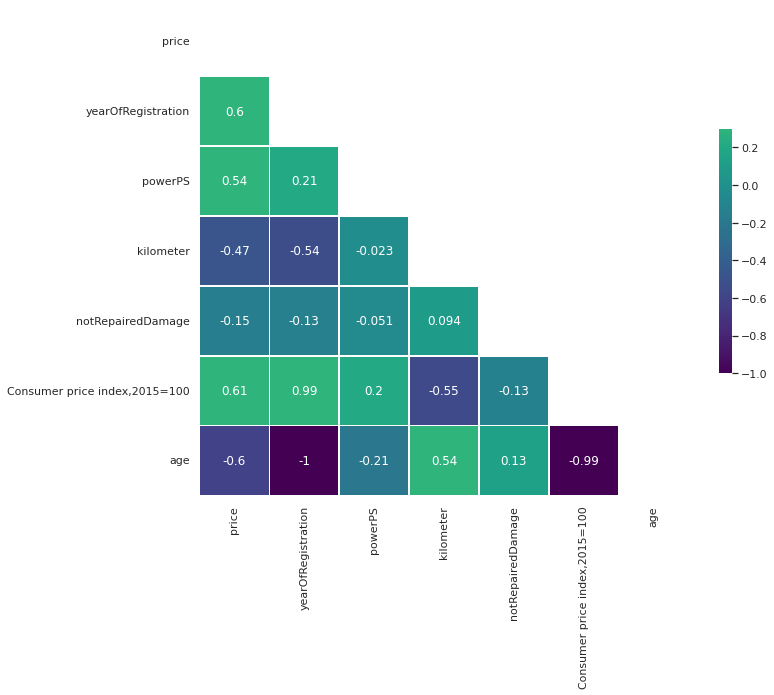

In [ ]:
sns.set_theme(style="white")
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.color_palette("viridis", as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

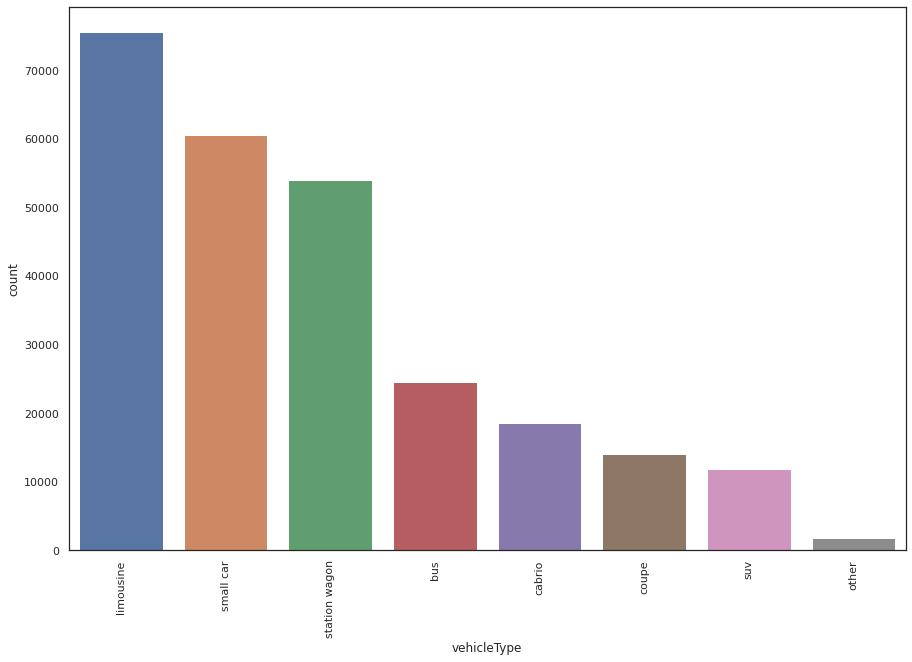

In [ ]:
ax = sns.countplot(x="vehicleType", data=df, order = df['vehicleType'].value_counts().index)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

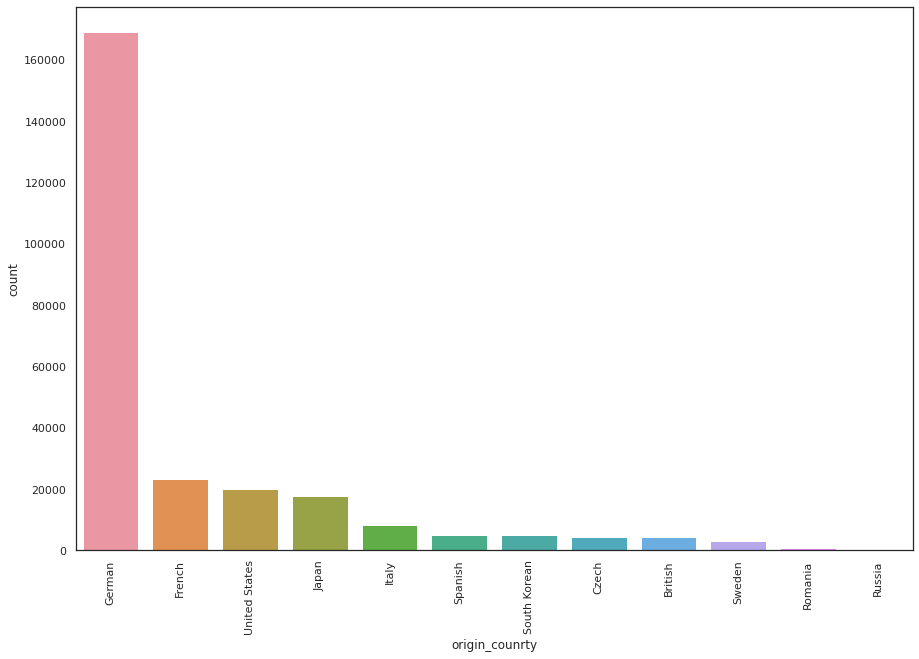

In [ ]:
ax = sns.countplot(x="origin_counrty", data=df, order = df['origin_counrty'].value_counts().index)
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

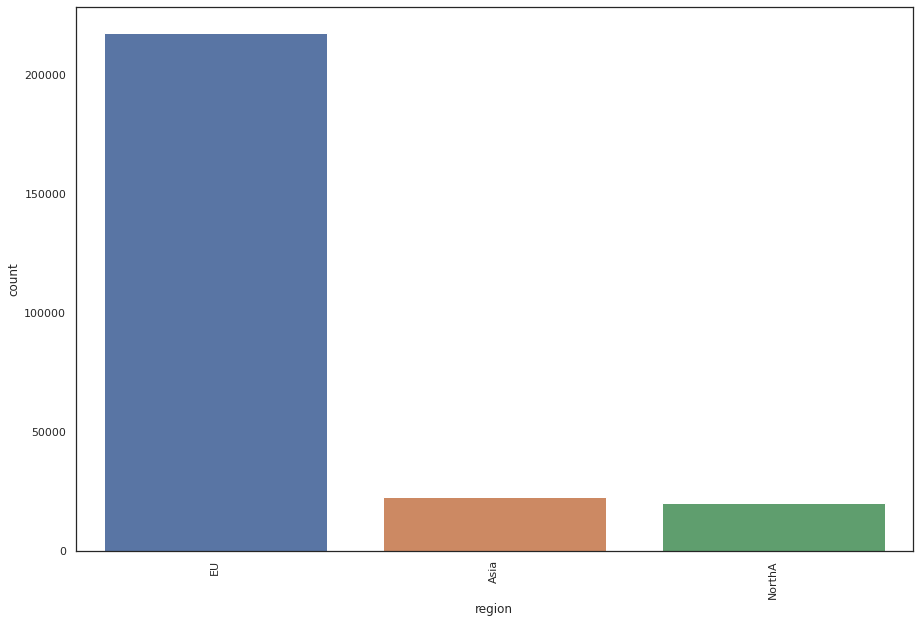

In [ ]:
ax = sns.countplot(x="region", data=df, order = df['region'].value_counts().index)
plt.xticks(rotation=90)

In [ ]:
# see the average price by vehicle type
df.groupby(by=['vehicleType']).mean()

,price,yearOfRegistration,powerPS,kilometer,notRepairedDamage,"Consumer price index,2015=100",age
vehicleType,,,,,,,
bus,7013.641341,2005.031572,121.289037,128536.277346,0.089665,86.877822,16.968428
cabrio,10215.793394,2003.559262,153.804026,112108.160622,0.047172,85.019775,18.440738
coupe,10868.762546,2003.284788,184.734602,123551.824922,0.077131,84.719618,18.715212
limousine,6461.556658,2003.240254,141.622287,127596.992182,0.084113,84.624373,18.759746
other,4389.117748,2002.435382,110.318782,130132.107984,0.148191,83.569443,19.564618
small car,3098.973651,2003.309215,74.608303,117456.057753,0.097813,84.714144,18.690785
station wagon,6273.132328,2004.215977,144.178150,135346.263728,0.097692,85.859322,17.784023
suv,14026.926939,2006.891043,176.784203,111919.234677,0.055113,89.494175,15.108957


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

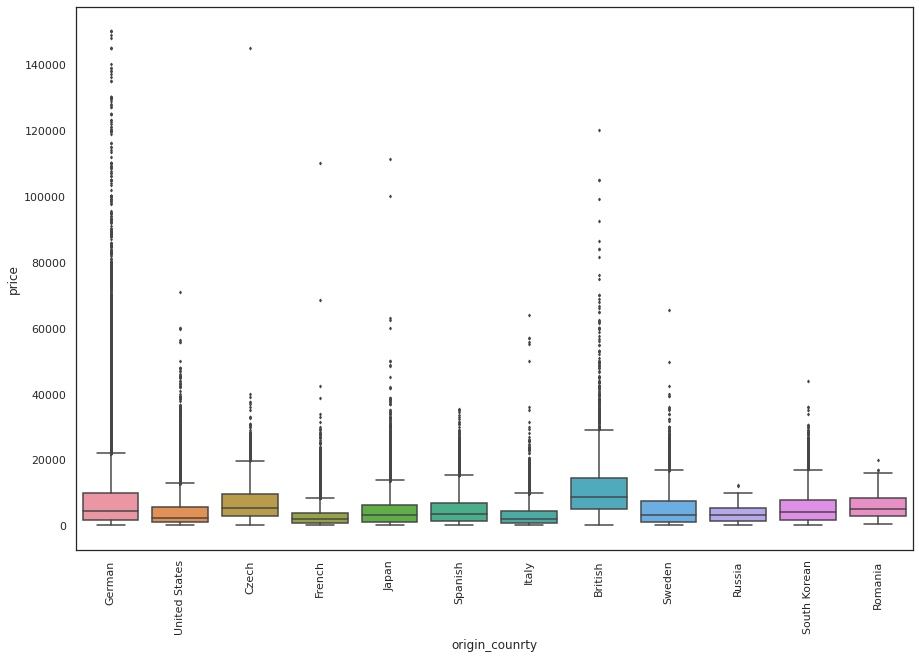

In [ ]:
ax = sns.boxplot(x="origin_counrty", y="price", fliersize=2,data=df)
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

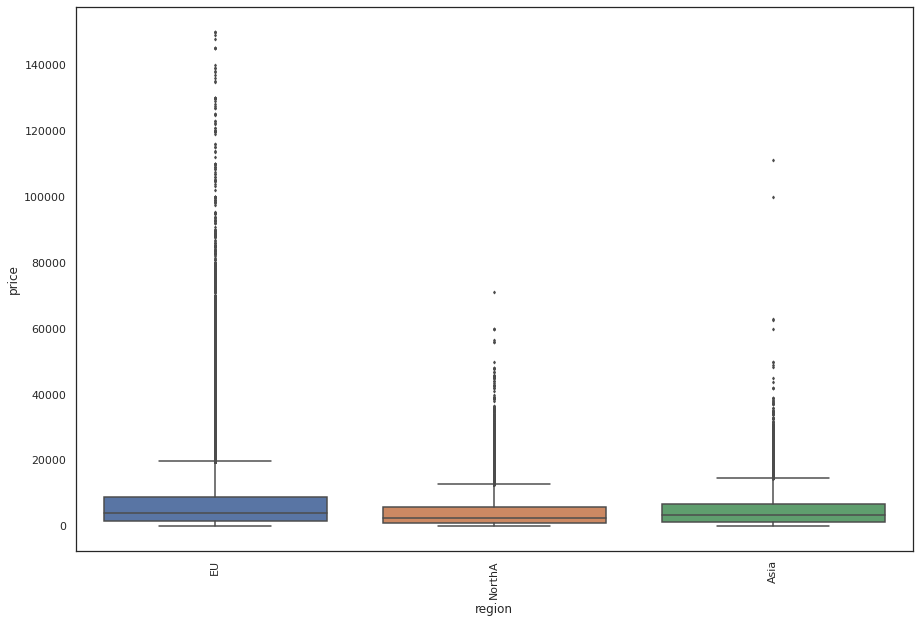

In [ ]:
ax = sns.boxplot(x="region", y="price", fliersize=2,data=df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

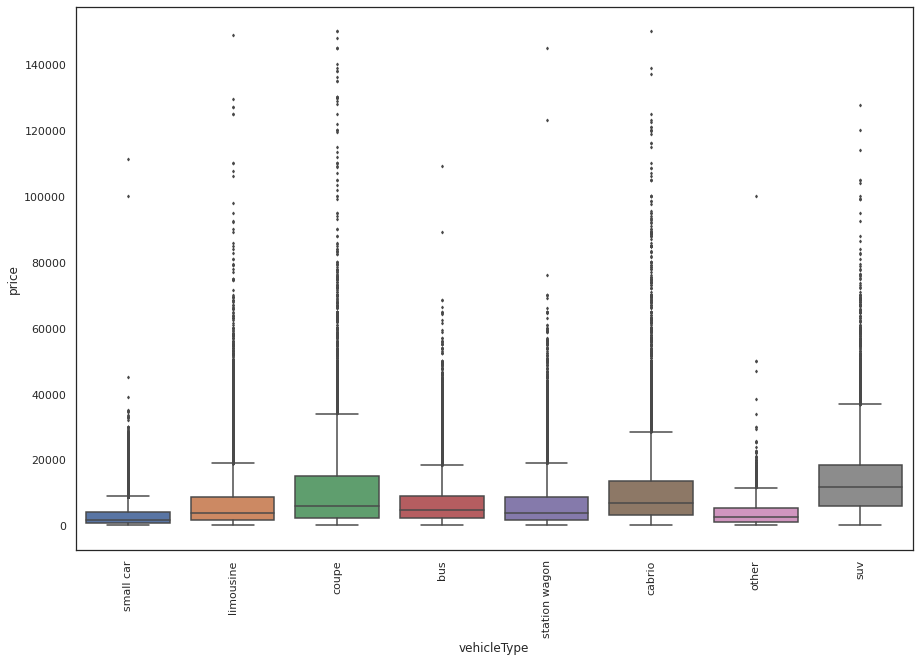

In [ ]:
ax = sns.boxplot(x="vehicleType", y="price", fliersize=2,data=df)
plt.xticks(rotation=90)

In [ ]:
df.groupby(by=['seller','vehicleType']).mean()

price  yearOfRegistration     powerPS  \
seller  vehicleType                                                   
private bus             7013.641341         2005.031572  121.289037   
        cabrio         10215.793394         2003.559262  153.804026   
        coupe          10868.762546         2003.284788  184.734602   
        limousine       6461.556658         2003.240254  141.622287   
        other           4389.117748         2002.435382  110.318782   
        small car       3098.973651         2003.309215   74.608303   
        station wagon   6273.132328         2004.215977  144.178150   
        suv            14026.926939         2006.891043  176.784203   

                           kilometer  notRepairedDamage  \
seller  vehicleType                                       
private bus            128536.277346           0.089665   
        cabrio         112108.160622           0.047172   
        coupe          123551.824922           0.077131   
        limousine      127596.992182           0.084113   
        other          130132.107984           0.148191   
        small car      117456.057753           0.097813   
        station wagon  135346.263728           0.097692   
        suv            111919.234677           0.055113   

                       Consumer price index,2015=100        age  
seller  vehicleType                                              
private bus                                86.877822  16.968428  
        cabrio                             85.019775  18.440738  
        coupe                              84.719618  18.715212  
        limousine                          84.624373  18.759746  
        other                              83.569443  19.564618  
        small car                          84.714144  18.690785  
        station wagon                      85.859322  17.784023  
        suv                                89.494175  15.108957

In [ ]:
df.groupby(by=['region']).mean()

,price,yearOfRegistration,powerPS,kilometer,notRepairedDamage,"Consumer price index,2015=100",age
region,,,,,,,
Asia,5060.087450,2004.243456,113.558248,116212.201474,0.097117,85.921489,17.756544
EU,6869.573831,2003.754030,132.244780,126051.577918,0.083618,85.288498,18.245970
NorthA,4467.324091,2003.954780,114.360117,122472.669449,0.108825,85.501163,18.045220


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

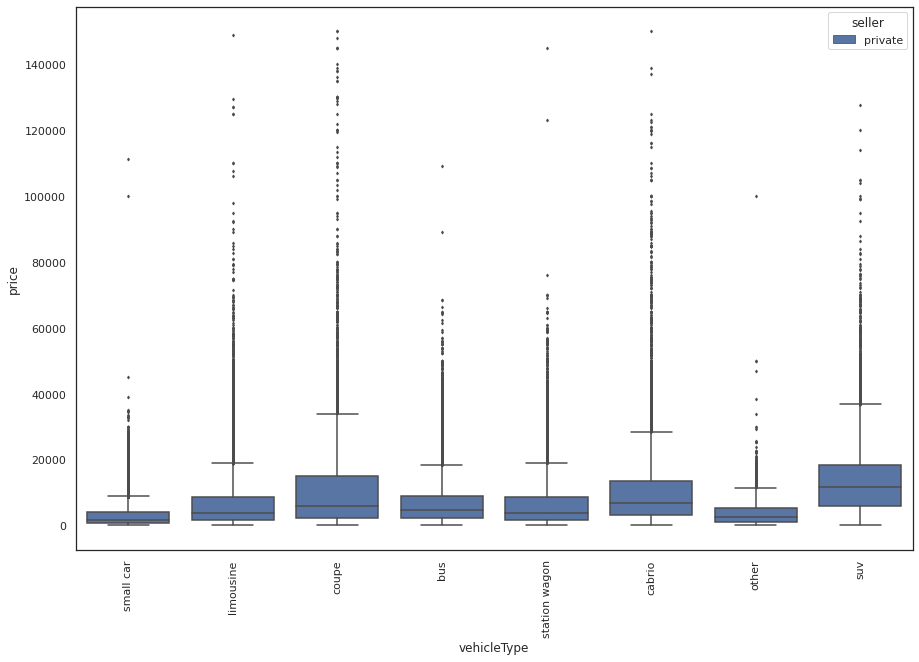

In [ ]:
ax = sns.boxplot(x="vehicleType", y="price", hue='seller', fliersize=2,data=df)
plt.xticks(rotation=90)

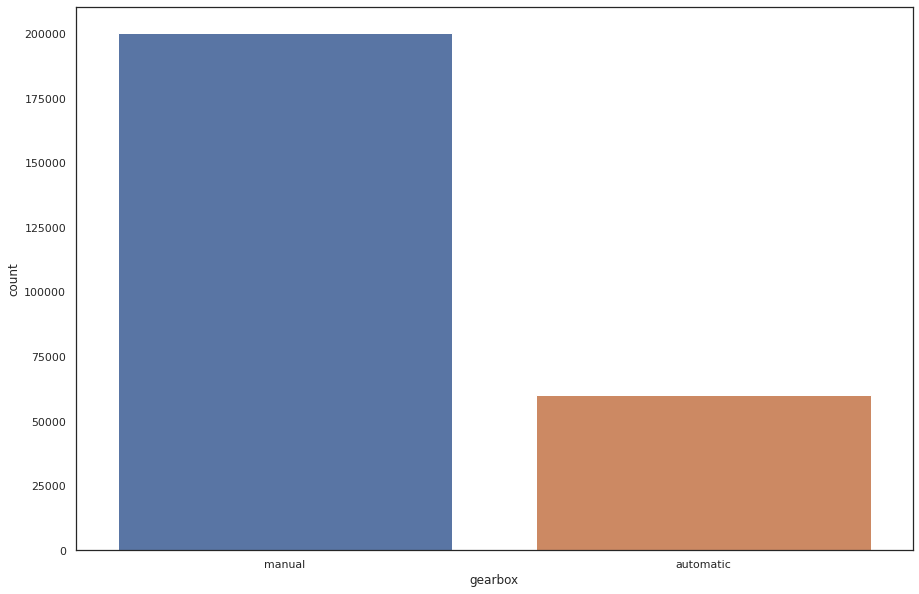

In [ ]:
ax = sns.countplot(x="gearbox", data=df)

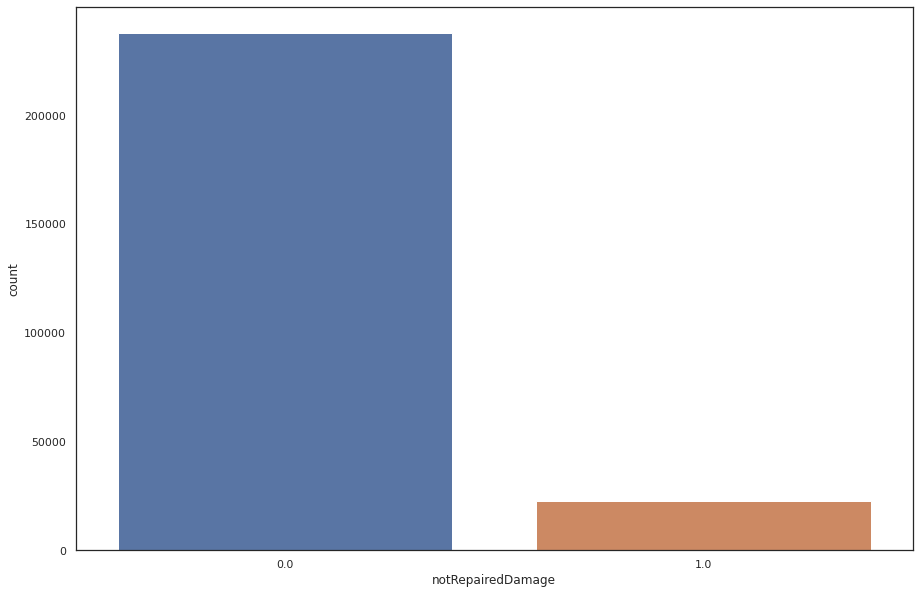

In [ ]:
ax = sns.countplot(x="notRepairedDamage", data=df)

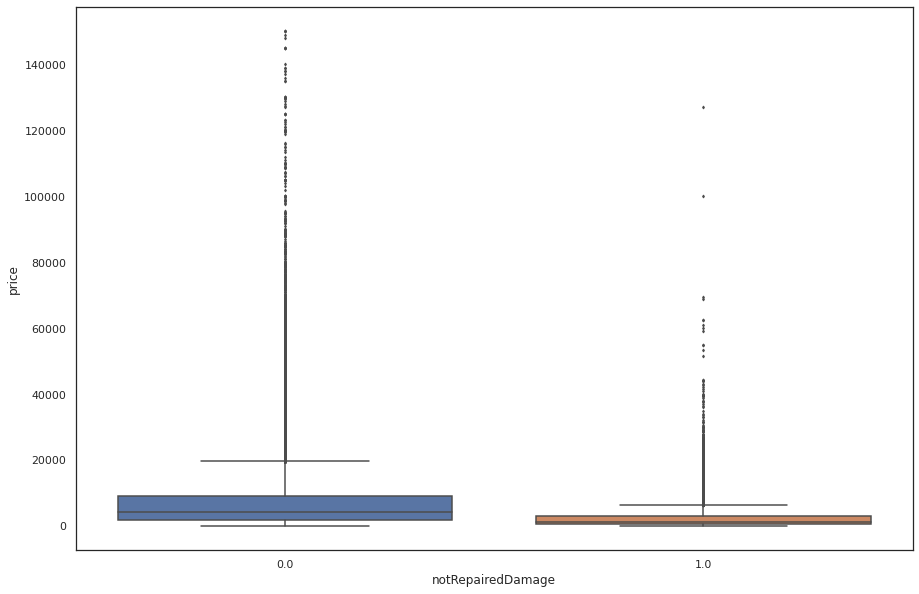

In [ ]:
ax = sns.boxplot(x="notRepairedDamage", y="price", fliersize=2,data=df)

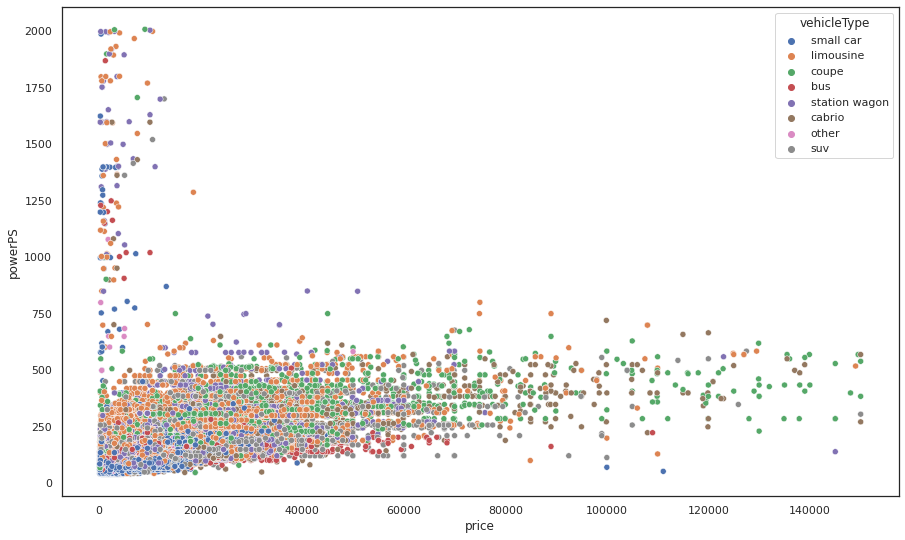

In [ ]:
sns.scatterplot(data = df, x = "price", y = "powerPS", hue="vehicleType")
plt.show()

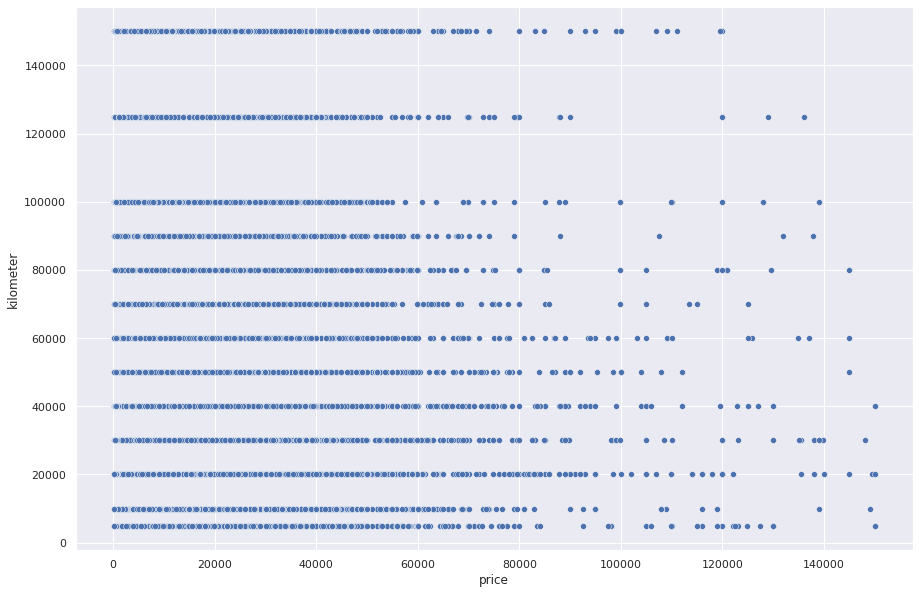

In [ ]:
sns.scatterplot(data = df, x = "price", y = "kilometer")
plt.show()

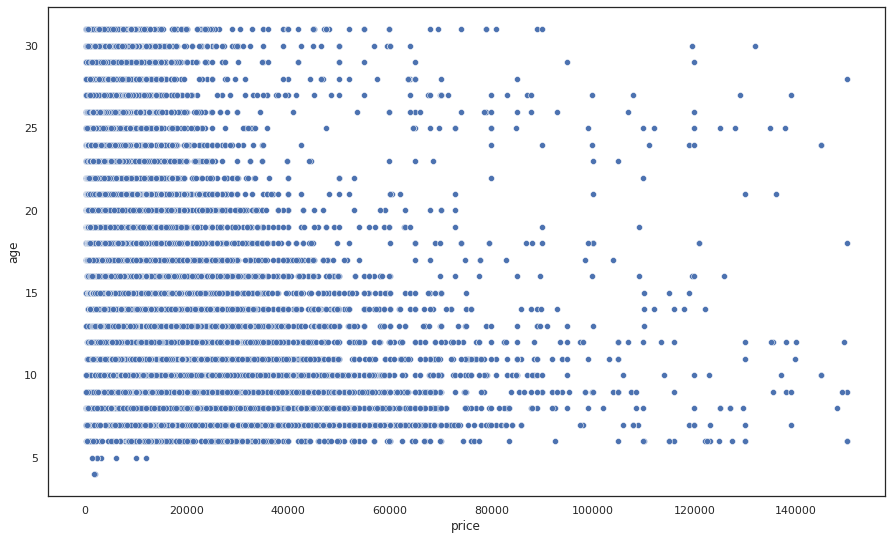

In [ ]:
sns.scatterplot(data = df, x = "price", y = "age")
plt.show()

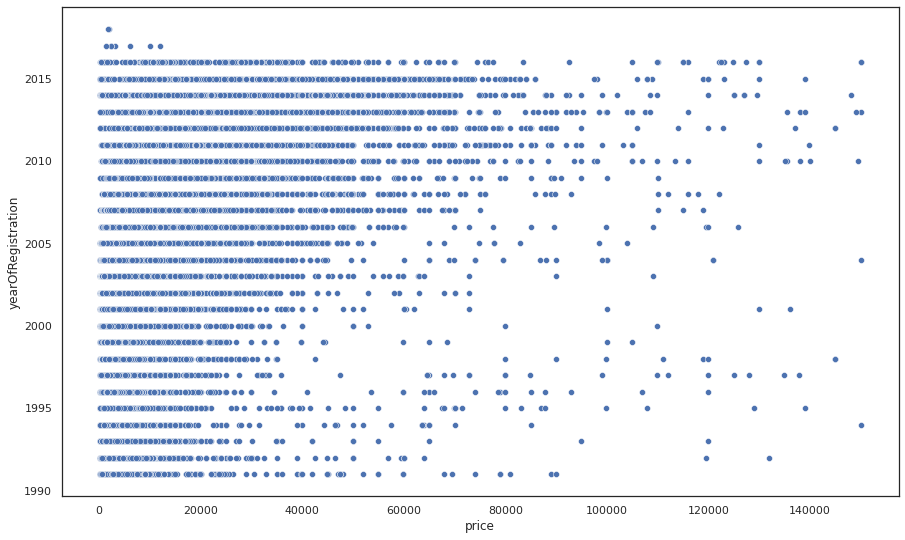

In [ ]:
sns.scatterplot(data = df, x = "price", y = "yearOfRegistration")
plt.show()

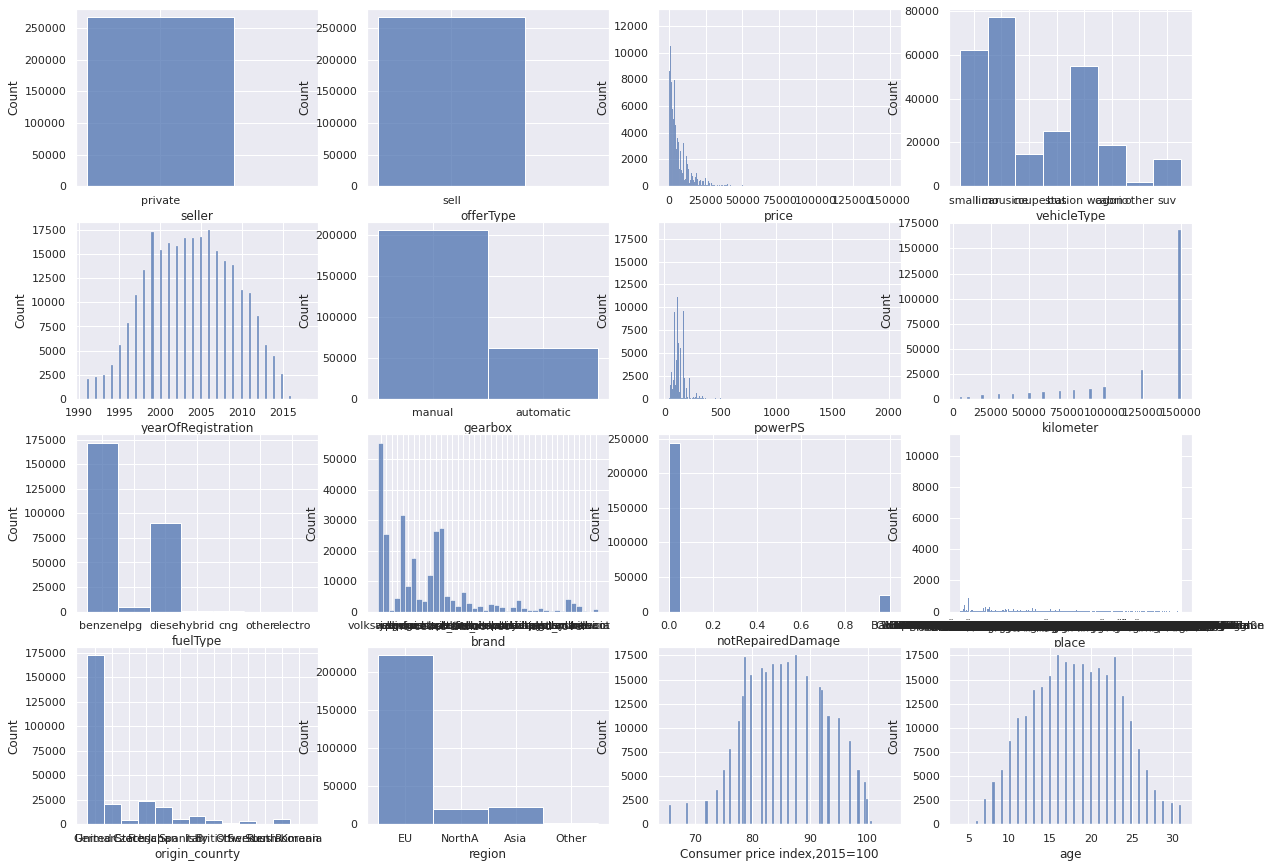

In [ ]:
for i, column in enumerate(df.columns, 1):
    plt.subplot(4,4,i)
    sns.histplot(df[column])

### **TRAING MODEL, AND RESULT**

In [ ]:
X = df[['seller','offerType','vehicleType','yearOfRegistration','gearbox','powerPS','kilometer','fuelType','brand','notRepairedDamage','age','place','origin_counrty','region','Consumer price index,2015=100']]
y = df['price']

## encoding data

In [ ]:
# label encoding
le = preprocessing.LabelEncoder()

In [ ]:
# tranform categories data to numberical data
X['seller'] = le.fit_transform(X['seller'])
X['offerType'] = le.fit_transform(X['offerType'])
X['vehicleType'] = le.fit_transform(X['vehicleType'])
X['gearbox'] = le.fit_transform(X['gearbox'])
X['fuelType'] = le.fit_transform(X['fuelType'])
X['brand'] = le.fit_transform(X['brand'])
X['place'] = le.fit_transform(X['place'])
X['origin_counrty'] = le.fit_transform(X['origin_counrty'])
X['region'] = le.fit_transform(X['region'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

## Performance of model

In [ ]:
model_reg = LinearRegression()
regressor = DecisionTreeRegressor(random_state=0)
regr = RandomForestRegressor(random_state=0)
xgb = GradientBoostingRegressor(random_state=0)

In [ ]:
model_reg = LinearRegression()
model_reg.fit(X_train, y_train)
y_pred_reg = model_reg.predict(X_test)
mse_reg = mean_squared_error(y_test, y_pred_reg)
print('MSE of Linear Regression:', mse_reg)

MSE of Linear Regression: 33260679.645229932


In [ ]:
# Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)
y_pred_dtr = regressor.predict(X_test)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
print('MSE of Decision Tree Regressor:', mse_dtr)

MSE of Decision Tree Regressor: 26637560.194903944


In [ ]:
# Random Forest Regressor
regr = RandomForestRegressor(random_state=0)
regr.fit(X_train, y_train)
y_pred_regr = regr.predict(X_test)
mse_regr = mean_squared_error(y_test, y_pred_regr)
print('MSE of Random Forest Regressor:', mse_regr)

r2_regr = r2_score(y_test, y_pred_regr)
print('r2 of Random Forest Regressor:', r2_regr)

MSE of Random Forest Regressor: 12494046.335956438
r2 of Random Forest Regressor: 0.8240363536982405


In [ ]:
# Gradient Boosting Regressor
xgb = GradientBoostingRegressor(random_state=0)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print('MSE of Gradient Boosting Regressor:', mse_xgb)

r2_xgb = r2_score(y_test, y_pred_xgb)
print('r2 of Gradient Boosting Regressor:', r2_xgb)

MSE of Gradient Boosting Regressor: 13853222.377236186
r2 of Gradient Boosting Regressor: 0.8048939905471384


                               Coefficients
Consumer price index,2015=100  9.533974e+02
region                         9.004580e+02
age                            3.678794e+02
fuelType                       3.107412e+02
powerPS                        4.365315e+01
brand                          3.802415e+00
place                          4.749199e-02
offerType                      1.638124e-08
kilometer                     -5.229041e-02
origin_counrty                -2.102091e+02
vehicleType                   -2.169769e+02
yearOfRegistration            -3.678794e+02
notRepairedDamage             -1.483869e+03
gearbox                       -1.805646e+03
seller                        -3.072800e+03


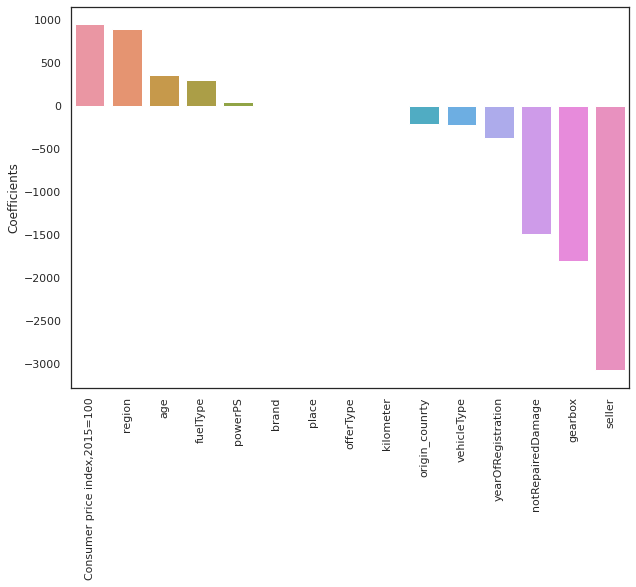

In [ ]:
# Coefficients of linear regression

cdf_reg = pd.DataFrame(model_reg.coef_, X.columns, columns=['Coefficients'])
cdf_reg = cdf_reg.sort_values(by='Coefficients',ascending=False)
print(cdf_reg)
ax = plt.subplots(figsize=(10, 7))
x = cdf_reg.index
ax = sns.barplot(x=x,y='Coefficients', data=cdf_reg)
plt.xticks(rotation=90)
plt.show()

                                importances
powerPS                        3.446222e-01
yearOfRegistration             3.147442e-01
kilometer                      8.725051e-02
brand                          6.409889e-02
place                          5.701238e-02
age                            3.868720e-02
vehicleType                    3.357240e-02
Consumer price index,2015=100  2.141465e-02
fuelType                       1.207496e-02
origin_counrty                 1.136749e-02
gearbox                        8.585317e-03
notRepairedDamage              3.805304e-03
region                         2.764529e-03
seller                         2.368186e-08
offerType                      0.000000e+00


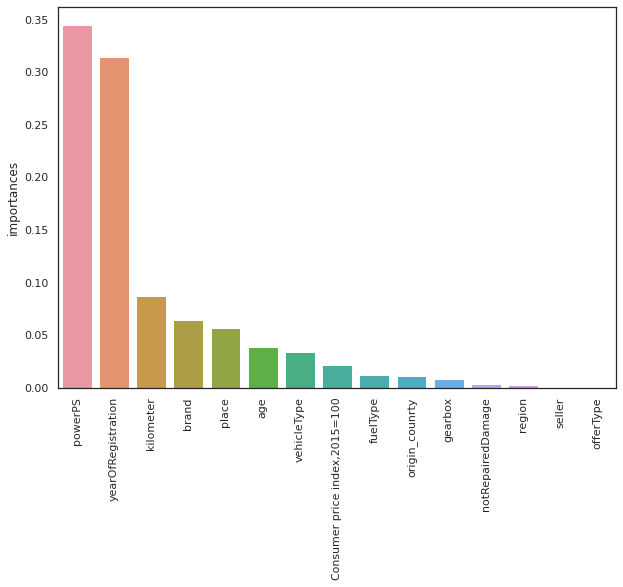

In [ ]:
# Coefficients of Decision Tree Regressor

cdf_regressor = pd.DataFrame(regressor.feature_importances_, X.columns, columns=['importances'])
cdf_regressor = cdf_regressor.sort_values(by='importances',ascending=False)
print(cdf_regressor)
ax = plt.subplots(figsize=(10, 7))
x = cdf_regressor.index
ax = sns.barplot(x=x,y='importances', data=cdf_regressor)
plt.xticks(rotation=90)
plt.show()

                                importances
powerPS                        3.511612e-01
Consumer price index,2015=100  1.428018e-01
age                            1.274032e-01
yearOfRegistration             1.075418e-01
kilometer                      8.654081e-02
brand                          5.694127e-02
place                          5.316606e-02
vehicleType                    3.744756e-02
fuelType                       1.046447e-02
origin_counrty                 1.006188e-02
gearbox                        8.784831e-03
notRepairedDamage              4.209553e-03
region                         3.475583e-03
seller                         2.140500e-08
offerType                      0.000000e+00


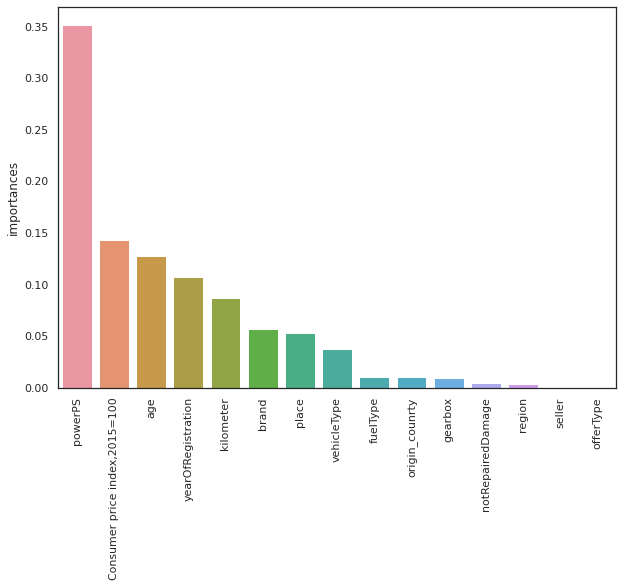

In [ ]:
# Coefficients of Random Forest Regressor

cdf_regr = pd.DataFrame(regr.feature_importances_, X.columns, columns=['importances'])
cdf_regr= cdf_regr.sort_values(by='importances',ascending=False)
print(cdf_regr)
ax = plt.subplots(figsize=(10, 7))
x = cdf_regr.index
ax = sns.barplot(x=x,y='importances', data=cdf_regr)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# create list of model
list_mod = [model_reg,regressor,regr]

In [ ]:
#5 fold cross-validation 
for i in list_mod:
  score_mse = cross_val_score(i, X, y,scoring='neg_mean_squared_error',cv=5)
  score_mse.tolist()
  print(i,"%0.4f accuracy with a standard deviation of %0.4f" % (score_mse.mean(), score_mse.std()))

LinearRegression() -43142749.2639 accuracy with a standard deviation of 29371557.2985
DecisionTreeRegressor(random_state=0) -39285781.4982 accuracy with a standard deviation of 35466358.9299
RandomForestRegressor(random_state=0) -20529939.6044 accuracy with a standard deviation of 17226601.0372


In [ ]:
#5 fold cross-validation R2
for i in list_mod:
  score_mse = cross_val_score(i, X, y,scoring='r2',cv=5)
  score_mse.tolist()
  print(i,"%0.4f accuracy with a standard deviation of %0.4f" % (score_mse.mean(), score_mse.std()))

LinearRegression() 0.2761 accuracy with a standard deviation of 0.1274
DecisionTreeRegressor(random_state=0) 0.3936 accuracy with a standard deviation of 0.1617
RandomForestRegressor(random_state=0) 0.6774 accuracy with a standard deviation of 0.0697


# Compare orignal model with 3 method

1.   Tranform target variable
2.   Normalize Data
3.   Tranform target variable + Normalize Data

## Tranform target variable

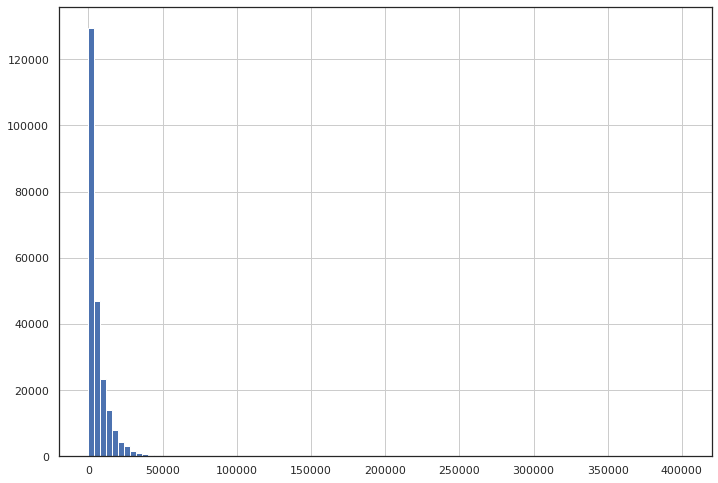

In [ ]:
y_train.hist(bins=100)

In [ ]:
# tranform target variable
y_tran = np.log1p(y_train)

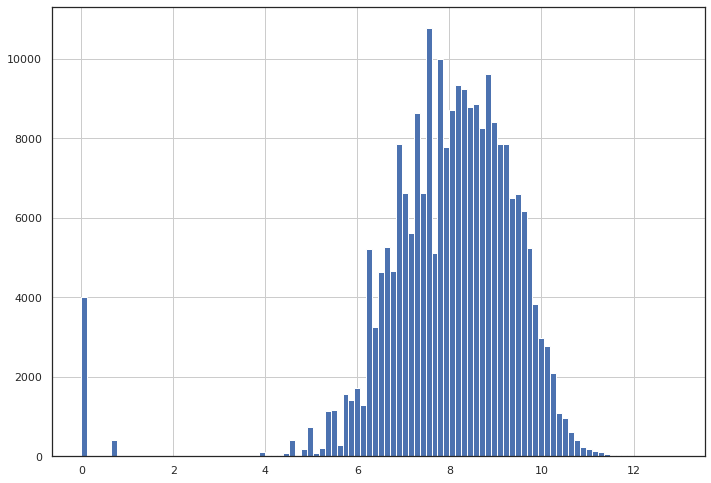

In [ ]:
y_tran.hist(bins=100)

In [ ]:
y_train

320215    23490
20623      2750
253734     1500
177616     8800
92259      2500
          ...  
264873     1499
110001    10900
160711     5100
194117     2290
155607     6700
Name: price, Length: 234108, dtype: int64

In [ ]:
np.exp(y_tran)-1

320215    23490.0
20623      2750.0
253734     1500.0
177616     8800.0
92259      2500.0
           ...   
264873     1499.0
110001    10900.0
160711     5100.0
194117     2290.0
155607     6700.0
Name: price, Length: 234108, dtype: float64

In [ ]:
# linear regression
model_reg = LinearRegression()
model_reg.fit(X_train, y_tran)
y_pred_reg = model_reg.predict(X_test)
inv_y_pred_reg = np.exp(y_pred_reg)-1
mse_reg = mean_squared_error(y_test, inv_y_pred_reg)
print('MSE of Linear Regression:', mse_reg)

MSE of Linear Regression: 63291674649.85005


In [ ]:
# DecisionTree
model_dct = DecisionTreeRegressor(random_state=0)
model_dct.fit(X_train, y_tran)
y_pred_reg = model_dct.predict(X_test)
inv_y_pred_reg = np.exp(y_pred_reg)-1
mse_reg = mean_squared_error(y_test, inv_y_pred_reg)
print('MSE of Dicsion Tree Regressor:', mse_reg)

MSE of Dicsion Tree Regressor: 23116134.339786407


In [ ]:
# RandomForestRegressor
model_regr = RandomForestRegressor(random_state=0)
model_regr.fit(X_train, y_tran)
y_pred_reg = model_regr.predict(X_test)
inv_y_pred_reg = np.exp(y_pred_reg)-1
mse_reg = mean_squared_error(y_test, inv_y_pred_reg)
print('MSE of RandomForestRegressor:', mse_reg)

r2_regr = r2_score(y_test, inv_y_pred_reg)
print('r2 of Random Forest Regressor:', r2_regr)

MSE of RandomForestRegressor: 11421143.178708537
r2 of Random Forest Regressor: 0.8391469068850563


In [ ]:
# Gradient Boosting Regressor
model_xgb = GradientBoostingRegressor(random_state=0)
model_xgb.fit(X_train, y_tran)
y_pred_xgb = model_xgb.predict(X_test)
inv_y_pred_xgb = np.exp(y_pred_xgb)-1
mse_xgb = mean_squared_error(y_test, inv_y_pred_xgb)
print('MSE of Gradient Boosting Regressor:', mse_xgb)

r2_xgb = r2_score(y_test, inv_y_pred_xgb)
print('r2 of Gradient Boosting Regressor:', r2_xgb)

MSE of Gradient Boosting Regressor: 20201257.25751803
r2 of Gradient Boosting Regressor: 0.7154895386706889


## Normalize Data

In [ ]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

In [ ]:
X_numpy = X.to_numpy()
y_numpy = y.to_numpy()

In [ ]:
scaler_x = scaler.fit(X_numpy.reshape(-1,15))
scaler_y = scaler.fit(y_numpy.reshape(-1,1))

In [ ]:
scaled_test_x = scaler_x.fit_transform(X_numpy.reshape(-1,15))
scaled_test_y = scaler_y.fit_transform(y_numpy.reshape(-1,1))

In [ ]:
scaled_data = np.concatenate((scaled_test_x,scaled_test_y),axis=1)

In [ ]:
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(scaled_test_x, scaled_test_y, test_size=0.2,random_state=0)

In [ ]:
print(f'training features: {X_train_sc.shape}')
print(f'training label: {y_train_sc.shape}')
print(f'test features: {X_test_sc.shape}')
print(f'test label: {y_test_sc.shape}')

training features: (234108, 15)
training label: (234108, 1)
test features: (58527, 15)
test label: (58527, 1)


In [ ]:
# test performance after rescale data by inverse of y predict and y test
print('calculate MSE Afrer inverse scale')
# linear regression
model_reg = LinearRegression()
model_reg.fit(X_train_sc, y_train_sc)
y_pred_reg = model_reg.predict(X_test_sc)
inv_y_pred_reg = scaler_y.inverse_transform(y_pred_reg.reshape(-1,1))
mse_reg = mean_squared_error(y_test, inv_y_pred_reg)
print('MSE of Linear Regression:', mse_reg)

calculate MSE Afrer inverse scale
MSE of Linear Regression: 33256222.03339203


In [ ]:
# Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train_sc, y_train_sc)
y_pred_dtr = regressor.predict(X_test_sc)
inv_y_pred_dtr = scaler_y.inverse_transform(y_pred_dtr.reshape(-1,1))
mse_dtr = mean_squared_error(y_test, inv_y_pred_dtr)
print('MSE of Decision Tree Regressor:', mse_dtr)

MSE of Decision Tree Regressor: 21659220.03611554


In [ ]:
#Random Forest Regressor
regr = RandomForestRegressor(random_state=0)
regr.fit(X_train_sc, y_train_sc)
y_pred_regr = regr.predict(X_test_sc)
inv_y_pred_regr = scaler_y.inverse_transform(y_pred_regr.reshape(-1,1))
mse_regr = mean_squared_error(y_test, inv_y_pred_regr)
print('MSE of Random Forest Regressor:', mse_regr)

r2_regr = r2_score(y_test, inv_y_pred_regr)
print('r2 of Random Forest Regressor:', r2_regr)

MSE of Random Forest Regressor: 12384958.667955045
r2 of Random Forest Regressor: 0.825572722566414


In [ ]:
# Gradient Boosting Regressor
xgb = GradientBoostingRegressor(random_state=0)
xgb.fit(X_train_sc, y_train_sc)
y_pred_xgb = xgb.predict(X_test_sc)
inv_y_pred_xgb = scaler_y.inverse_transform(y_pred_xgb.reshape(-1,1))
mse_xgb = mean_squared_error(y_test, inv_y_pred_xgb)
print('MSE of Gradient Boosting Regressor:', mse_xgb)

r2_xgb = r2_score(y_test, inv_y_pred_xgb)
print('r2 of Gradient Boosting Regressor:', r2_xgb)

MSE of Gradient Boosting Regressor: 13868644.634617152
r2 of Gradient Boosting Regressor: 0.8046767865629375


## Tranform target variable + Normalize Data

In [ ]:
# linear regression
model_reg = LinearRegression()
model_reg.fit(X_train_sc, y_tran)
y_pred_reg = model_reg.predict(X_test_sc)
inv_y_pred_reg = np.exp(y_pred_reg)-1
mse_reg = mean_squared_error(y_test, inv_y_pred_reg)
print('MSE of Linear Regression:', mse_reg)

MSE of Linear Regression: 63577206485.439026


In [ ]:
# Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train_sc, y_tran)
y_pred_dtr = regressor.predict(X_test_sc)
inv_y_pred_dtr = np.exp(y_pred_dtr)-1
mse_dtr = mean_squared_error(y_test, inv_y_pred_dtr)
print('MSE of Decision Tree Regressor:', mse_dtr)

MSE of Decision Tree Regressor: 23147055.221934933


In [ ]:
#Random Forest Regressor
regr = RandomForestRegressor(random_state=0)
regr.fit(X_train_sc, y_tran)
y_pred_regr = regr.predict(X_test_sc)
inv_y_pred_regr = np.exp(y_pred_regr)-1
mse_regr = mean_squared_error(y_test, inv_y_pred_regr)
print('MSE of Random Forest Regressor:', mse_regr)

r2_regr = r2_score(y_test, inv_y_pred_regr)
print('r2 of Random Forest Regressor:', r2_regr)

MSE of Random Forest Regressor: 11419210.662047012
r2 of Random Forest Regressor: 0.8391741240626749


In [ ]:
# Gradient Boosting Regressor
xgb = GradientBoostingRegressor(random_state=0)
xgb.fit(X_train_sc, y_tran)
y_pred_xgb = xgb.predict(X_test_sc)
inv_y_pred_xgb = np.exp(y_pred_xgb)-1
mse_xgb = mean_squared_error(y_test, inv_y_pred_xgb)
print('MSE of Gradient Boosting Regressor:', mse_xgb)

r2_regr = r2_score(y_test, inv_y_pred_xgb)
print('r2 of Gradient Boosting Regressor:', r2_xgb)

MSE of Gradient Boosting Regressor: 20230096.521129735
r2 of Gradient Boosting Regressor: 0.8048939905471384


# Select and tune model

In [ ]:
param_grid = { "criterion" : ["squared_error"]
              , "max_depth": [10]
              , "n_estimators": [500]}

In [ ]:
grid_search = GridSearchCV(regr, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

In [ ]:
grid_search.fit(X_train_sc, y_tran)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'criterion': ['squared_error'], 'max_depth': [10],
                         'n_estimators': [500]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=10, n_estimators=500, random_state=0)

In [ ]:
final_model = grid_search.best_estimator_

In [ ]:
y_pred_regr_f = final_model.predict(X_test_sc)
inv_y_pred_regr_f = np.exp(y_pred_regr_f)-1
mse_regr_f = mean_squared_error(y_test, inv_y_pred_regr_f)
print('MSE of Random Forest Regressor:', mse_regr_f)

r2_regr_f = r2_score(y_test, inv_y_pred_regr_f)
print('r2 of Random Forest Regressor:', r2_regr_f)

MSE of Random Forest Regressor: 15083366.272732101
r2 of Random Forest Regressor: 0.7875688902948396


In [ ]:
grid_search_xgb = GridSearchCV(xgb, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

In [ ]:
grid_search_xgb.fit(X_train_sc, y_tran)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=0),
             param_grid={'criterion': ['squared_error'], 'max_depth': [10],
                         'n_estimators': [500]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
final_model_xgb = grid_search_xgb.best_estimator_

In [ ]:
y_pred_xgb_f = final_model_xgb.predict(X_test_sc)
inv_y_pred_xgb_f = np.exp(y_pred_xgb_f)-1
mse_xgb_f = mean_squared_error(y_test, inv_y_pred_xgb_f)
print('MSE of Gradient Boosting Regressor:', mse_xgb_f)

r2_xgb_f = r2_score(y_test, inv_y_pred_xgb_f)
print('r2 of Gradient Boosting Regressor:', r2_xgb_f)

MSE of Gradient Boosting Regressor: 13207127.892902834
r2 of Gradient Boosting Regressor: 0.813993455865397


In [ ]:
### Done ###

# Table of Compare performance

## MSE

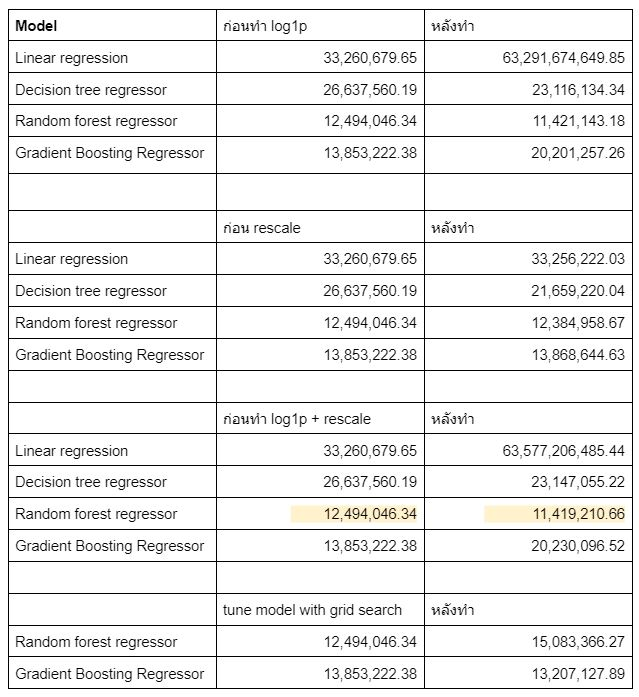

## R2

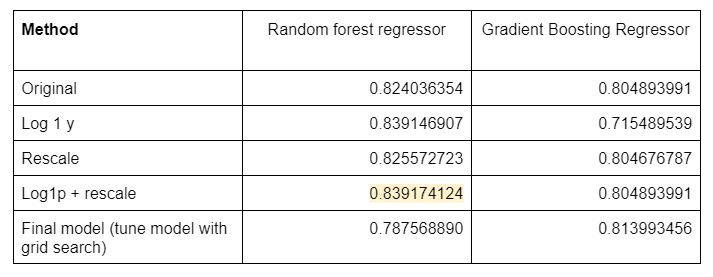